<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [59]:
%pip install seaborn
%pip install scipy

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [61]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [62]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [63]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [64]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [65]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [66]:
# your code goes here
df['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

In [67]:
df['ConvertedComp'].replace(np.NaN, df['ConvertedComp'].median(), inplace = True )

In [68]:
df['ConvertedComp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11398 entries, 0 to 11397
Series name: ConvertedComp
Non-Null Count  Dtype  
--------------  -----  
11398 non-null  float64
dtypes: float64(1)
memory usage: 89.1 KB


In [69]:
df['ConvertedComp'].max()

2000000.0

<Figure size 800x400 with 0 Axes>

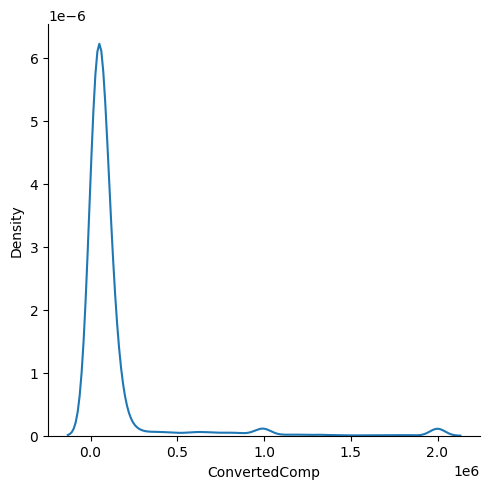

In [70]:
# Not the best way to produce a histogram plot is seems fpor now 
plt.figure(figsize=(8,4))  
sns.displot(data = df, x = 'ConvertedComp', kind = 'kde')
plt.show()

In [71]:
df['ConvertedComp'].describe()

count    1.139800e+04
mean     1.263096e+05
std      2.846750e+05
min      0.000000e+00
25%      2.901600e+04
50%      5.774500e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

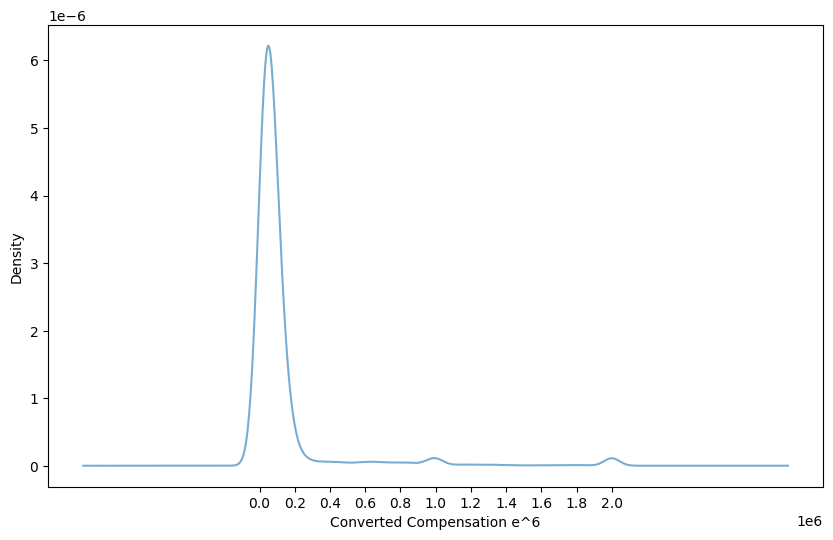

In [72]:
count, bin_edges = np.histogram(df['ConvertedComp'])

# un-stacked histogram
df['ConvertedComp'].plot(kind ='kde', 
                         figsize=(10, 6),
                         alpha=0.6,
                         xticks=bin_edges,
                         )

#plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
#plt.ylabel('Number of Years')
plt.xlabel('Converted Compensation e^6')

plt.show()

Plot the histogram for the column `ConvertedComp`.


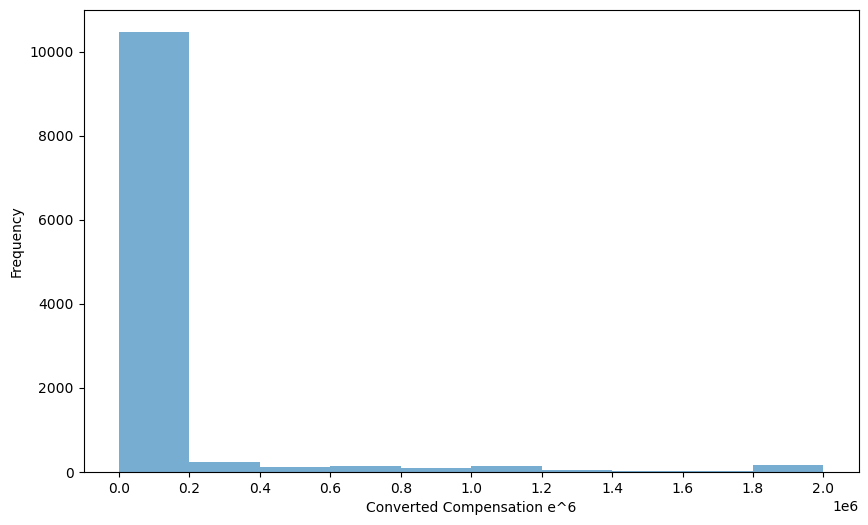

In [73]:
# your code goes here
count, bin_edges = np.histogram(df['ConvertedComp'])

# un-stacked histogram
df['ConvertedComp'].plot(kind ='hist', 
                         figsize=(10, 6),
                         alpha=0.6,
                         xticks=bin_edges,
                         )

#plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
#plt.ylabel('Number of Years')
plt.xlabel('Converted Compensation e^6')

plt.show()


In [74]:
bin_edges

array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
       1200000., 1400000., 1600000., 1800000., 2000000.])

In [75]:
count

array([10475,   238,   115,   125,    99,   131,    34,    15,    15,
         151], dtype=int32)

In [76]:
bin_edges.round(0)

array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
       1200000., 1400000., 1600000., 1800000., 2000000.])

What is the median of the column `ConvertedComp`?


In [77]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [78]:
# your code goes here
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [79]:
(df['Gender'] == 'Man').value_counts()

Gender
True     10480
False      918
Name: count, dtype: int64

In [80]:
df['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11398 entries, 0 to 11397
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
11325 non-null  object
dtypes: object(1)
memory usage: 44.6+ KB


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [81]:
# your code goes here
df_women = df[df['Gender'] == 'Woman']
df_women['ConvertedComp'].median()

57745.0

In [82]:
df_women['Gender'].value_counts()

Gender
Woman    731
Name: count, dtype: int64

In [83]:
df_women['ConvertedComp'].isnull().value_counts() #.replace(np.NaN, 'Woman', inplace = True)

ConvertedComp
False    731
Name: count, dtype: int64

In [84]:
df_women['Gender'].value_counts()

Gender
Woman    731
Name: count, dtype: int64

In [85]:
df_men = df[df['Gender'] == 'Man']
df_men['ConvertedComp'].median()

57745.0

In [86]:
df['Gender']= df['Gender'].replace(np.NaN, 'Woman')

In [87]:
df_women2 = df[df['Gender'] == 'Woman']

In [88]:
df_women2['Gender'].value_counts()

Gender
Woman    804
Name: count, dtype: int64

In [89]:
df_women2['ConvertedComp'].median()

57745.0

In [90]:
df_men['Gender'].value_counts()

Gender
Man    10480
Name: count, dtype: int64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [91]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [92]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11398 entries, 0 to 11397
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
11111 non-null  float64
dtypes: float64(1)
memory usage: 89.1 KB


In [93]:
df['Age'].isnull().value_counts()

Age
False    11111
True       287
Name: count, dtype: int64

In [94]:
df['Age'].mean()

30.778894788947888

In [95]:
df['Age'].median()

29.0

In [96]:
df['Age']= df['Age'].replace(np.NaN, 31)  # replaceing with 31 - apx age

In [97]:
df['Age'].isnull().value_counts()

Age
False    11398
Name: count, dtype: int64

In [98]:
df['Age'].mean()

30.78446218634848

In [99]:
df['Age'].median()

29.0

In [100]:
df['Age'].describe()

count    11398.000000
mean        30.784462
std          7.300081
min         16.000000
25%         26.000000
50%         29.000000
75%         34.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


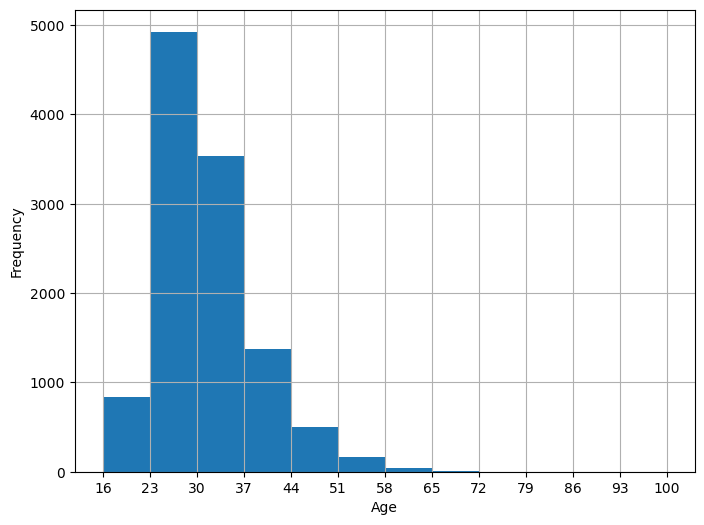

In [101]:
# your code goes here
custom_bin_edges = np.arange(16, 105, 7)
count, bin_edges = np.histogram(df['Age'], bins=custom_bin_edges) 

# un-stacked histogram
df['Age'].plot(kind ='hist', 
                      figsize=(8, 6),
                      bins=bin_edges,
                      #alpha=0.6,
                      xticks=bin_edges,
              )

#plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
#plt.ylabel('Number of Years')
plt.xlabel('Age')
plt.grid(True)

plt.show()


In [102]:
np.arange(16, 105, 7)

array([ 16,  23,  30,  37,  44,  51,  58,  65,  72,  79,  86,  93, 100])

In [103]:
bin_edges

array([ 16,  23,  30,  37,  44,  51,  58,  65,  72,  79,  86,  93, 100])

In [104]:
count

array([ 835, 4926, 3536, 1377,  500,  168,   47,    7,    1,    0,    0,
          1], dtype=int32)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


/lib/python3.12/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='ConvertedComp'>

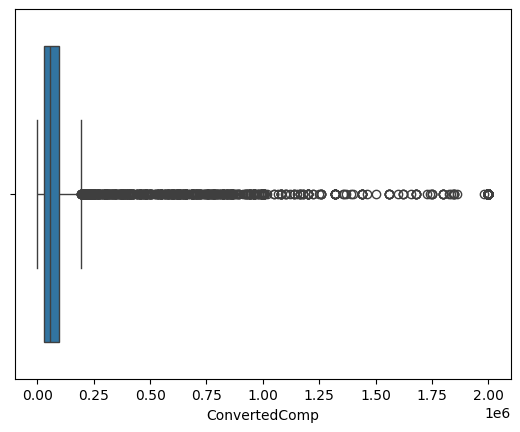

In [105]:
# your code goes here
sns.boxplot( x='ConvertedComp', orient = 'v', data = df  )

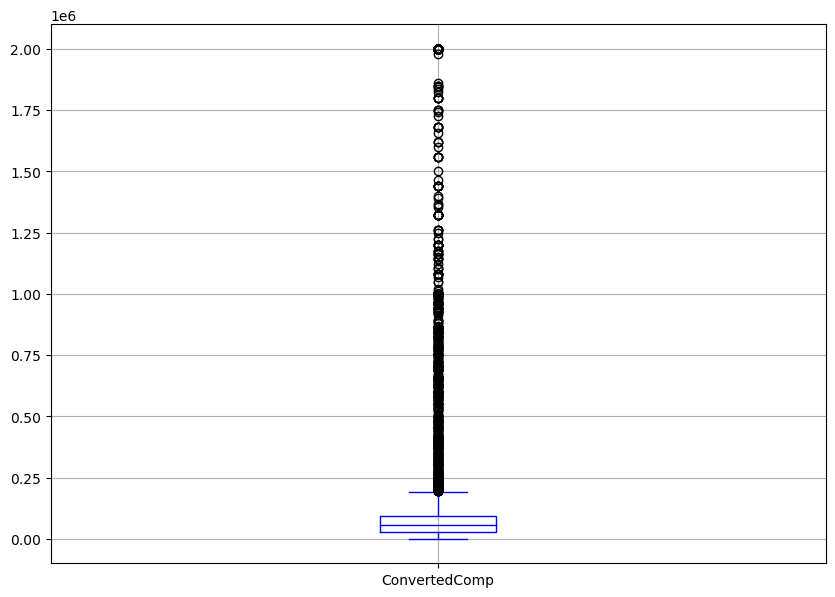

In [106]:
df['ConvertedComp'].plot(kind ='box', figsize=(10, 7), color='blue' )
plt.grid(True)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [107]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print("The inter quartile range for the column ConvertedComp is:", IQR)

29016.0
95000.0
The inter quartile range for the column ConvertedComp is: 65984.0


Find out the upper and lower bounds.


In [108]:
print("The upper bound of the ConvertedComp column", df['ConvertedComp'].max())
print("The lower bound of the ConvertedComp column", df['ConvertedComp'].min())

The upper bound of the ConvertedComp column 2000000.0
The lower bound of the ConvertedComp column 0.0


In [109]:
 df['ConvertedComp'].describe()

count    1.139800e+04
mean     1.263096e+05
std      2.846750e+05
min      0.000000e+00
25%      2.901600e+04
50%      5.774500e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [110]:
# your code goes here


In [111]:
IQR15 = (1.5*IQR)

In [112]:
Q3 + IQR15

193976.0

Identify how many outliers are there in the `ConvertedComp` column.


In [113]:
# your code goes here
df[df['ConvertedComp']> 193976.0].shape[0]

933

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [114]:
df_removed_outliers = df[df['ConvertedComp'] <= 193976.0]

In [119]:
df_removed_outliers.shape

(10465, 85)

In [116]:
df_removed_outliers['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397     57745.0
Name: ConvertedComp, Length: 10465, dtype: float64

In [118]:
df_removed_outliers['ConvertedComp'].median()

57287.0

In [120]:
df_removed_outliers['ConvertedComp'].mean()

58992.50339225991

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [117]:
# your code goes here
df.corr(numeric_only = True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002468,-0.015314,0.004621,0.003955
CompTotal,-0.013490,1.000000,0.001031,0.003510,0.007063,0.006946
ConvertedComp,0.002468,0.001031,1.000000,0.020489,-0.034760,0.101818
WorkWeekHrs,-0.015314,0.003510,0.020489,1.000000,0.026517,0.036400
CodeRevHrs,0.004621,0.007063,-0.034760,0.026517,1.000000,-0.019382
Age,0.003955,0.006946,0.101818,0.036400,-0.019382,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
